
Register Number: 21BBS0166
Converted Categorical Data:
   Gender
0       0
1       1
2       1
3       1
4       0

Register Number: 21BBS0166
Features After Standardization:
        Age  Weight_kg  Height_cm       BMI  BloodPressure_mmHg  \
0 -1.565801  -0.446907   0.892729  1.614561            1.570434   
1  1.206755   0.652044  -0.868344 -0.102876            0.016674   
2 -1.635115  -0.996382  -0.055542 -1.089127           -0.021222   
3 -0.803348   1.430468   0.215393 -1.480227           -1.347602   
4 -0.248837  -1.179541  -1.139279  1.172448            0.395640   

   Cholesterol_mg/dL  
0          -0.861412  
1          -0.286499  
2           1.773609  
3          -0.382318  
4          -0.286499  

Register Number: 21BBS0166
Patient Data with Cluster Labels:
   Age  Weight_kg  Height_cm   BMI  BloodPressure_mmHg  Cholesterol_mg/dL  \
0   22         72        187  37.3                 172                189   
1   62         96        161  27.2                 131             

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


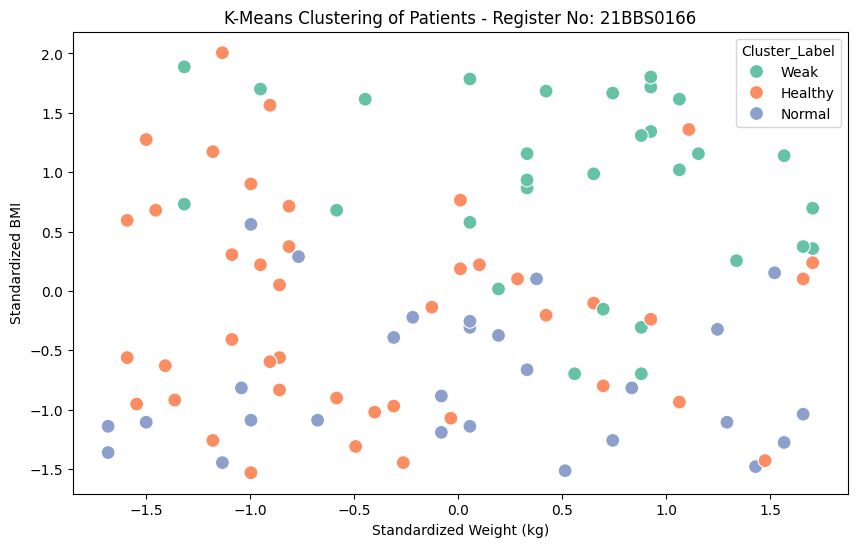

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './2.patient_clustering_data.csv'
patient_data = pd.read_csv(file_path)

# Convert 'Gender' column to numeric values if needed
patient_data['Gender'] = patient_data['Gender'].map({'Male': 1, 'Female': 0})

print("\nRegister Number: 21BBS0166")
print("Converted Categorical Data:")
print(patient_data[['Gender']].head())

# Select numeric features for clustering
features = patient_data[['Age', 'Weight_kg', 'Height_cm', 'BMI', 'BloodPressure_mmHg', 'Cholesterol_mg/dL']]

# Remove rows with negative values (if any)
features_cleaned = features[(features['Age'] >= 0) &
                             (features['Weight_kg'] >= 0) &
                             (features['Height_cm'] >= 0)]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_cleaned)

print("\nRegister Number: 21BBS0166")
print("Features After Standardization:")
print(pd.DataFrame(scaled_features, columns=features_cleaned.columns).head())

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to the cleaned dataset
patient_data_cleaned = patient_data.copy()
patient_data_cleaned['Cluster'] = kmeans.labels_

# Map cluster labels to meaningful categories
cluster_mapping = {0: 'Normal', 1: 'Healthy', 2: 'Weak'}
patient_data_cleaned['Cluster_Label'] = patient_data_cleaned['Cluster'].map(cluster_mapping)

print("\nRegister Number: 21BBS0166")
print("Patient Data with Cluster Labels:")
print(patient_data_cleaned[['Age', 'Weight_kg', 'Height_cm', 'BMI', 'BloodPressure_mmHg', 'Cholesterol_mg/dL', 'Cluster_Label']].head())

# Cluster analysis: Compute mean values for each cluster
cluster_analysis = patient_data_cleaned.groupby('Cluster_Label').mean()

print("\nRegister Number: 21BBS0166")
print("Cluster Analysis (Mean Values):")
print(cluster_analysis)

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 1], y=scaled_features[:, 3], hue=patient_data_cleaned['Cluster_Label'], palette="Set2", s=100)
plt.title("K-Means Clustering of Patients - Register No: 21BBS0166")
plt.xlabel("Standardized Weight (kg)")
plt.ylabel("Standardized BMI")
plt.show()
